# Our Hypothesis: A* finds always the 'ShortBest' path!

Let's see, if this is true ...

In [1]:
#!pip install pandas

In [2]:
# Importations
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import random
import pandas as pd

from algorithms import *
from classes import *
from utils import *
from env_levels import *
%matplotlib inline

# Our Static Environment

We've developed a custom environment using the **Minihack level editor** to gain precise control over our work. The environment we're working on is a 15x15 **fully observable maze**, where the agent navigates through the grid while avoiding hazardous **lava pools**.

The agent starts in the *top left corner* and needs to find the stairs in the *bottom right corner* while avoiding lava pools. 

Inside *env_levels.py* there is the *'.des-file'*:

* Agent: '@'
* Target: '>'
* Floor tile: '.'
* Walls: '-' and '|'
* Lava pools: 'L'

> As part of our exploration, we're committed to introducing and navigating through **various levels of complexity**. This initiative allows us to test and implement different search algorithms tailored to the evolving challenges presented by each level. This dynamic approach not only showcases the adaptability of our agent but also facilitates a comprehensive evaluation of its problem-solving capabilities across diverse scenarios.

For now, we: 
* initialize the specific map configuration
* set a random seed for reproducibility
* reset the environment to get the initial observation
* render the environment for visual representation

In [3]:
env_lv1 = gym.make(
    "MiniHack-Navigation-Custom-v0",
    des_file=des_file_static_lv1,
    #max_episode_steps=50,
    observation_keys =("chars", "colors", "specials", "pixel")
)

env_lv1.seed(42)
obs_lv1 = env_lv1.reset() #each reset generates a new environment instance
env_lv1.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---------------                                                                 
|@..}.........|                                                                 
|.....}.....}.|                                                                 
|}............|                                                                 
|.}.......}...|                                                                 
|...}}..}.....|                                                                 
|.}.........}.|                                                                 
|....}..}.....|                                                                 
|.}........}.}|            

In [4]:
env_lv1.actions

(<CompassDirection.N: 107>,
 <CompassDirection.E: 108>,
 <CompassDirection.S: 106>,
 <CompassDirection.W: 104>,
 <CompassDirection.NE: 117>,
 <CompassDirection.SE: 110>,
 <CompassDirection.SW: 98>,
 <CompassDirection.NW: 121>)

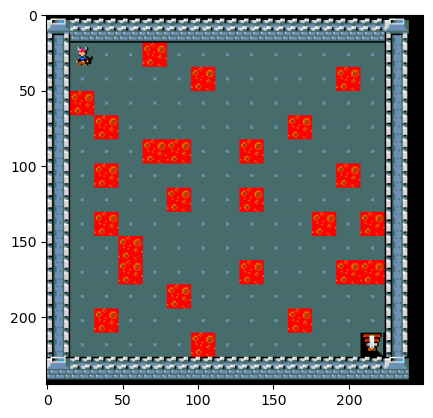

In [5]:
plt.imshow(obs_lv1['pixel'][45:290, 0:250]) #Plots directly from minihack generator

In [6]:
game = obs_lv1['pixel']

In [7]:
comparison_case1 = []
comparison_case2 = []
comparison_case3 = []
comparison_case4 = []
algorithms = ['Breadth First Search (UA)', 'Uniform Cost Search (UA)', 'A* (IA)', 'Greedy Best First Search (IA)']
time_case1 = []
path_case1 = []
path_cost_case1 = []
time_case2 = []
path_case2 = []
path_cost_case2 = []
time_case3 = []
path_case3 = []
path_cost_case3 = []
time_case4 = []
path_case4 = []
path_cost_case4 = []

## A GridWorld Problem

To streamline the implementation of search algorithms in our agent, we've established a problem definition encapsulated within a class. Specifically, we've conceptualized our problem using a **GridWorldProblem class**. This class serves as a foundation for formulating the problem in a way that aligns with the principles of graph search algorithms.

As these search algorithms operate on graphs, we visualize the **corresponding graph of the agent's environment**. This graph effectively represents the navigable nodes within the maze, and we highlight the coordinates of each node for clarity. The edges connecting these states within the graph are assigned a uniform cost of 1.

In our case we will consider the _chars_ representation, a multi-dimensional array containing the ASCII encoding of the characters. More specifically:

* Agent: ASCII 64
* Stairs: ASCII 62
* Walls: ASCII
* Lava: ASCII 125

> To ensure an accurate and meaningful representation of the maze environment within the graph, we undertake a crucial **preprocessing step**. This step involves meticulous manipulation of the Minihack matrix, allowing us to narrow our focus exclusively to the observable aspects of the environment.

In [8]:
game_map_lv1 = process_matrix(obs_lv1['chars'])
#print(game_map_lv1)

In [9]:
process_matrix(obs_lv1['colors'])
# 6 -> blue
# 1 -> red
game_map_lv1_colors = process_matrix(obs_lv1['colors'])

In [10]:
grid_problem1 = GridWorldProblem(game_map_lv1, find_state_coord(game_map_lv1, ord('@')), find_state_coord(game_map_lv1, ord('>')), game_map_lv1_colors)

print("Initial state:", grid_problem1.initial_state)
print("Goal state:", grid_problem1.goal_state)

basic_graph = create_basic_graph(grid_problem1, grid_problem1.initial_state)

plot_graph(basic_graph, "plots/case1/case1.png")

Initial state: (1, 1)
Goal state: (13, 13)


## <u> CASE 1 </u>

### Uninformed Agent (Breadth-First-Search)

Our uninformed agent employs the Breadth-First Search (BFS) algorithm to navigate through the grid world problem.

* Red Nodes: Lava pools.
* Green Nodes: Nodes visited by the agent
* Blue Node: Initial position of the agent

> This visualization provides a clear depiction of the agent's exploration process, distinguishing between hazardous areas (lava pools), traversed paths, and the starting point of the agent. The Breadth-First Search algorithm ensures a systematic exploration of the grid, contributing to efficient pathfinding in our maze-like environment.

In [11]:
uninformed_agent = UninformedSearchAgent(grid_problem1) # Instantiate an Uninformed Search Agent

solution_path = uninformed_agent.search(breadth_first_search) # Perform uniformed search with the Breadth-First Search

time_case1.append(uninformed_agent.execution_time())
path_case1.append(len(solution_path))

print(f'Time: {uninformed_agent.execution_time()} seconds')
print(f'The found path is long {len(solution_path)}.')

# Cost path computation
path_cost_case1.append(len(solution_path)*1)
print(f'The cost of the taken path is {len(solution_path)*1}.')

# Highlight the explored nodes in green
basic_graph = create_basic_graph(grid_problem1, grid_problem1.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

plot_graph(explored_graph, "plots/case1/breadth_first_search.png") # Plot the graph with both basic and explored nodes

Time: 0.002803 seconds
The found path is long 29.
The cost of the taken path is 29.


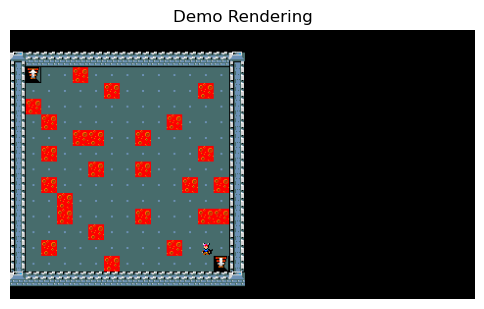

In [12]:
# PLOT
actions = actions_from_path(find_state_coord(game_map_lv1, ord('@')), solution_path)

import IPython.display as display

# Create a new figure without plotting anything
plt.figure(figsize=(6, 6))
plt.axis('off')  # Turn off axis ticks and labels
plt.title('Demo Rendering')

image = plt.imshow(game[25:300, :475])
for action in actions:
    s, _, _, _ = env_lv1.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][25:300, :475])
    time.sleep(0.3)

### Uninformed Agent (Dijkstra's Algorithm) 

In [13]:
uninformed_agent = UninformedSearchAgent(grid_problem1)
solution_path, node_distances = uninformed_agent.search(uniform_cost_search)

time_case1.append(uninformed_agent.execution_time())
path_case1.append(len(solution_path))

print(f'Time: {uninformed_agent.execution_time()} seconds')
print(f'The taken path has the length {len(solution_path)} (steps).')

# Cost path computation
path_cost_case1.append(len(solution_path)*1)
print(f'The cost of the taken path is {len(solution_path)*1}.')

# Highlight the explored nodes in green
basic_graph = create_basic_graph(grid_problem1, grid_problem1.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

# Plot the graph with both basic and explored nodes
plot_graph_distances(explored_graph, node_distances, "plots/case1/uniform_cost.png")

Time: 0.008949 seconds
The taken path has the length 13 (steps).
The cost of the taken path is 13.


### Informed Agent (A*)

In [14]:
informed_agent = InformedSearchAgent(grid_problem1)
solution_path, explored_nodes_paths, node_distances = informed_agent.search(astar_search, euclidean_distance)

time_case1.append(informed_agent.execution_time())
path_case1.append(len(solution_path))

print(f'Time: {informed_agent.execution_time()} seconds')
print(f"The found path is long {len(solution_path)}")

# Cost path computation
path_cost_case1.append(len(solution_path)*1)
print(f'The cost of the taken path is {len(solution_path)*1}.')

# Highlight the explored nodes in green
basic_graph = create_basic_graph(grid_problem1, grid_problem1.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)


# Plot the graph with both basic and explored nodes
plot_graph_distances(explored_graph, node_distances, "plots/case1/astar_search.png")

Time: 0.000733 seconds
The found path is long 13
The cost of the taken path is 13.


### Informed Agent (Greedy Best First Search)

In [15]:
informed_agent = InformedSearchAgent(grid_problem1)
solution_path, explored_nodes_paths, node_distances = informed_agent.search(greedy_best_first_search, euclidean_distance)

time_case1.append(informed_agent.execution_time())
path_case1.append(len(solution_path))

print(f'Time: {informed_agent.execution_time()} seconds')
print(f"The found path is long {len(solution_path)}")

# Cost path computation
path_cost_case1.append(len(solution_path)*1)
print(f'The cost of the taken path is {len(solution_path)*1}.')

# Highlight the explored nodes in green
basic_graph = create_basic_graph(grid_problem1, grid_problem1.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

# Plot the graph with both basic and explored nodes
plot_graph_distances(explored_graph, node_distances, "plots/case1/greedy_best_first_search.png")

Time: 0.000542 seconds
The found path is long 13
The cost of the taken path is 13.


## CASE 1: Performance Evaluation and Comparison of Search Algorithms

In [16]:
comparison_case1.append(algorithms)
comparison_case1.append(time_case1)
comparison_case1.append(path_case1)
comparison_case1.append(path_cost_case1)
df_case1 = pd.DataFrame()
df_case1['Algorithm'] = algorithms
df_case1['Execution Time'] = time_case1
df_case1['Path Length'] = path_case1
df_case1['Path Cost'] = path_cost_case1
df_case1.set_index('Algorithm', inplace=True)
df_case1

Execution Time  Path Length  Path Cost
Algorithm                                                            
Breadth First Search (UA)            0.002803           29         29
Uniform Cost Search (UA)             0.008949           13         13
A* (IA)                              0.000733           13         13
Greedy Best First Search (IA)        0.000542           13         13

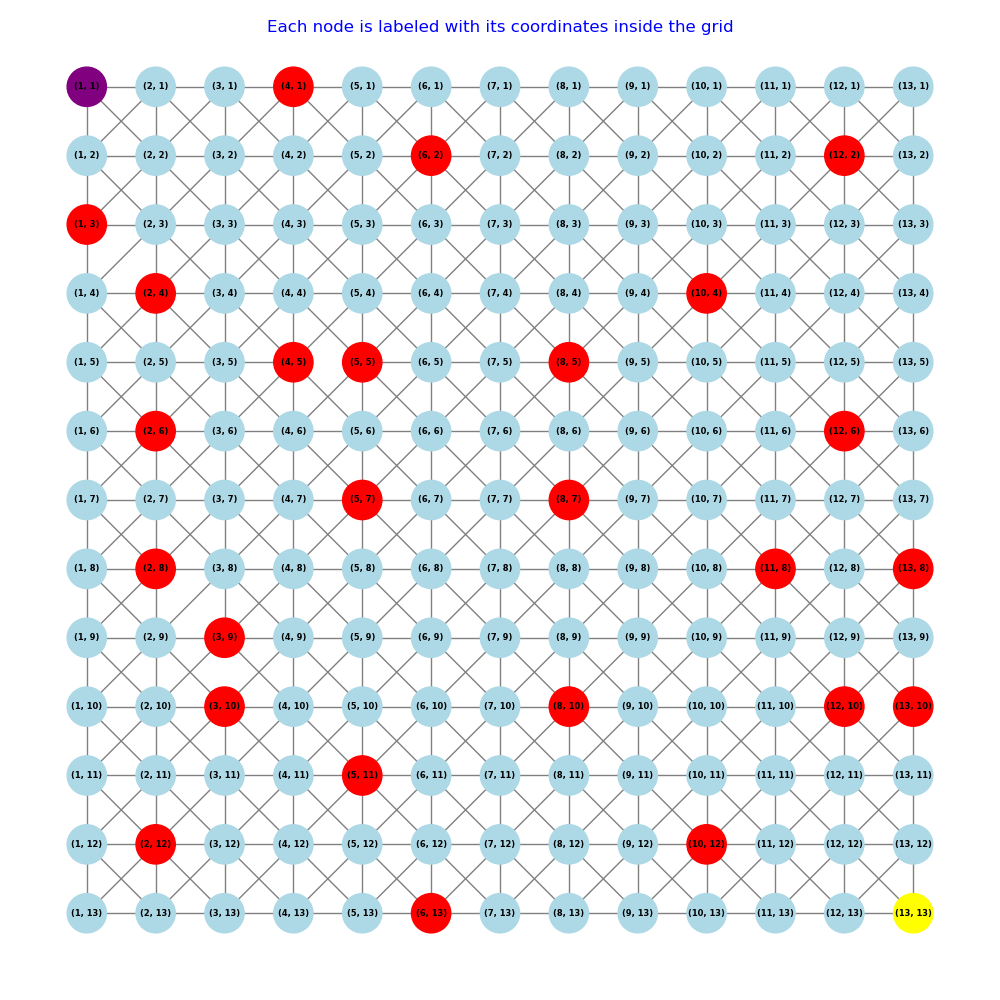

In [17]:
from IPython.display import Image

Image(filename='plots/case1/case1.png', width=500, height=500)

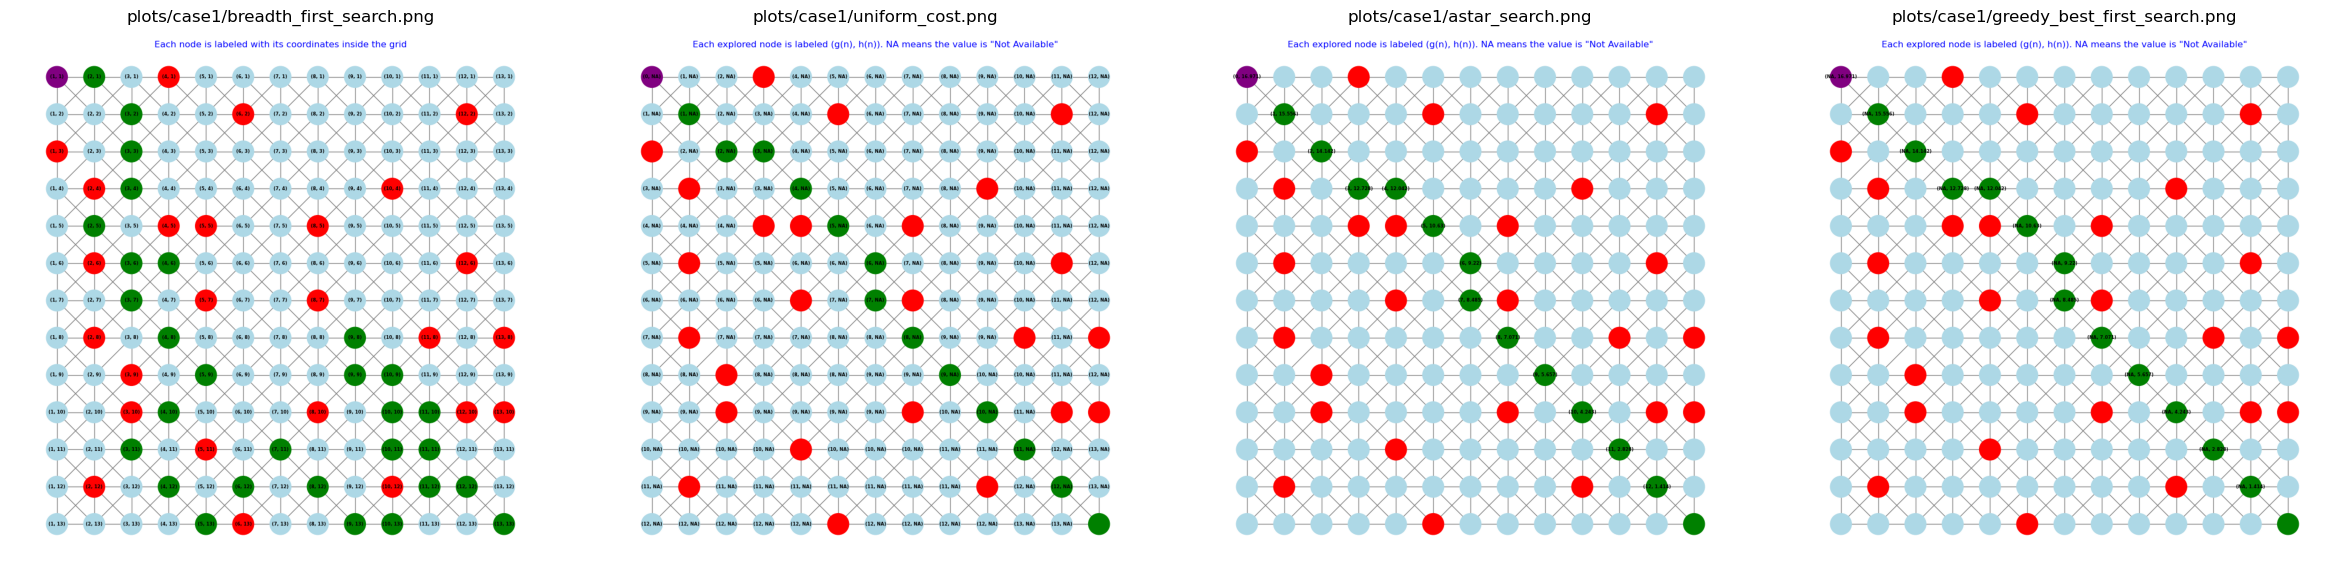

In [18]:
%matplotlib inline
plot_paths_case1 = ['plots/case1/breadth_first_search.png',
                    'plots/case1/uniform_cost.png',
                    'plots/case1/astar_search.png',
                    'plots/case1/greedy_best_first_search.png']

display_saved_plots(plot_paths_case1)

## <u> CASE 2 </u>
To increase the complexity of the environment and to test, how the algorithms work, we add more lava pools.

In [19]:
env_lv2 = gym.make(
    "MiniHack-Navigation-Custom-v0",
    des_file=des_file_static_lv2,
    #max_episode_steps=50,
    observation_keys =("chars", "colors", "specials", "pixel")
)

env_lv2.seed(42)
obs_lv2 = env_lv2.reset() #each reset generates a new environment instance
env_lv2.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---------------                                                                 
|@..}...}.}...|                                                                 
|.....}.....}.|                                                                 
|}..}.}.......|                                                                 
|.}.......}..}|                                                                 
|...}}..}.....|                                                                 
|..}........}.|                                                                 
|..}.}...}}...|                                                                 
|.}..}..}}.}..|            

In [20]:
plt.imshow(obs_lv2['pixel'][45:290, 0:250]) #Plots directly from minihack generator

game_map_lv2 = process_matrix(obs_lv2['chars'])

game_map_lv2_colors = process_matrix(obs_lv2['colors'])

In [21]:
grid_problem2 = GridWorldProblem(game_map_lv2, find_state_coord(game_map_lv2, ord('@')), find_state_coord(game_map_lv2, ord('>')), game_map_lv2_colors)

print("Initial state:", grid_problem2.initial_state)
print("Goal state:", grid_problem2.goal_state)

basic_graph = create_basic_graph(grid_problem2, grid_problem2.initial_state)

plot_graph(basic_graph, "plots/case2/case2.png")

Initial state: (1, 1)
Goal state: (13, 13)


### Uninformed Agent (Breadth-First-Search)

In [22]:

uninformed_agent = UninformedSearchAgent(grid_problem2) # Instantiate an Uninformed Search Agent

solution_path = uninformed_agent.search(breadth_first_search) # Perform uniformed search with the Breadth-First Search

time_case2.append(uninformed_agent.execution_time())
path_case2.append(len(solution_path))

print(f'Time: {uninformed_agent.execution_time()} seconds')
print(f'The found path is long {len(solution_path)}.')

# Cost path computation
path_cost_case2.append(len(solution_path)*1)
print(f'The cost of the taken path is {len(solution_path)*1}.')

# Highlight the explored nodes in green
basic_graph = create_basic_graph(grid_problem2, grid_problem2.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

plot_graph(explored_graph, "plots/case2/breadth_first_search.png") # Plot the graph with both basic and explored nodes

Time: 0.002495 seconds
The found path is long 28.
The cost of the taken path is 28.


### Uninformed Agent (Dijkstra's Algorithm)

In [23]:
uninformed_agent = UninformedSearchAgent(grid_problem2)
solution_path, node_distances = uninformed_agent.search(uniform_cost_search)

time_case2.append(uninformed_agent.execution_time())
path_case2.append(len(solution_path))

print(f'Time: {uninformed_agent.execution_time()} seconds')
print(f'The found path is long {len(solution_path)}.')

# Cost path computation
path_cost_case2.append(len(solution_path)*1)
print(f'The cost of the taken path is {len(solution_path)*1}.')

# Highlight the explored nodes in green
basic_graph = create_basic_graph(grid_problem2, grid_problem2.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

# Plot the graph with both basic and explored nodes
plot_graph_distances(explored_graph, node_distances, "plots/case2/uniform_cost.png")

Time: 0.005856 seconds
The found path is long 14.
The cost of the taken path is 14.


### Informed Agent (A*)

In [24]:
informed_agent = InformedSearchAgent(grid_problem2)
solution_path, explored_nodes_paths, node_distances = informed_agent.search(astar_search, euclidean_distance)

time_case2.append(informed_agent.execution_time())
path_case2.append(len(solution_path))

print(f'Time: {informed_agent.execution_time()} seconds')
print(f"The found path is long {len(solution_path)}")

# Cost path computation
path_cost_case2.append(len(solution_path)*1)
print(f'The cost of the taken path is {len(solution_path)*1}.')

# Highlight the explored nodes in green
basic_graph = create_basic_graph(grid_problem2, grid_problem2.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

# Plot the graph with both basic and explored nodes
plot_graph_distances(explored_graph, node_distances, "plots/case2/astar_search.png")

Time: 0.000791 seconds
The found path is long 14
The cost of the taken path is 14.


### Informed Agent (Greedy Best-First Search)

In [25]:
informed_agent = InformedSearchAgent(grid_problem2)
solution_path, explored_nodes_paths, node_distances = informed_agent.search(greedy_best_first_search, euclidean_distance)

time_case2.append(informed_agent.execution_time())
path_case2.append(len(solution_path))

print(f'Time: {informed_agent.execution_time()} seconds')
print(f"The found path is long {len(solution_path)}")

# Cost path computation
path_cost_case2.append(len(solution_path)*1)
print(f'The cost of the taken path is {len(solution_path)*1}.')

# Highlight the explored nodes in green
basic_graph = create_basic_graph(grid_problem2, grid_problem2.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

# Plot the graph with both basic and explored nodes
plot_graph_distances(explored_graph, node_distances, "plots/case2/greedy_best_first_search.png")

Time: 0.000589 seconds
The found path is long 14
The cost of the taken path is 14.


In [26]:
comparison_case2.append(algorithms)
comparison_case2.append(time_case2)
comparison_case2.append(path_case2)
comparison_case2.append(path_cost_case2)
df_case2 = pd.DataFrame()
df_case2['Algorithm'] = algorithms
df_case2['Execution Time'] = time_case2
df_case2['Path Length'] = path_case2
df_case2['Path Cost'] = path_cost_case2
df_case2.set_index('Algorithm', inplace=True)
df_case2

Execution Time  Path Length  Path Cost
Algorithm                                                            
Breadth First Search (UA)            0.002495           28         28
Uniform Cost Search (UA)             0.005856           14         14
A* (IA)                              0.000791           14         14
Greedy Best First Search (IA)        0.000589           14         14

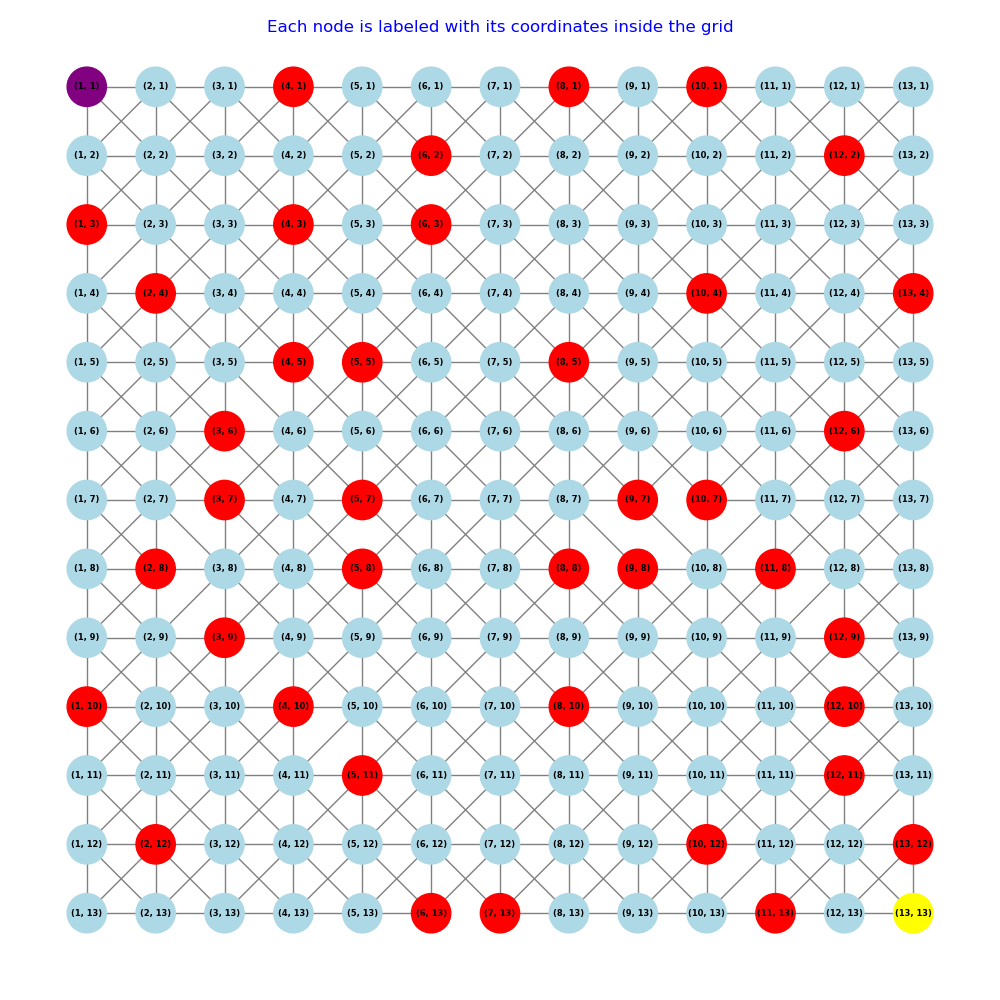

In [27]:
Image(filename='plots/case2/case2.png', width=500, height=500)

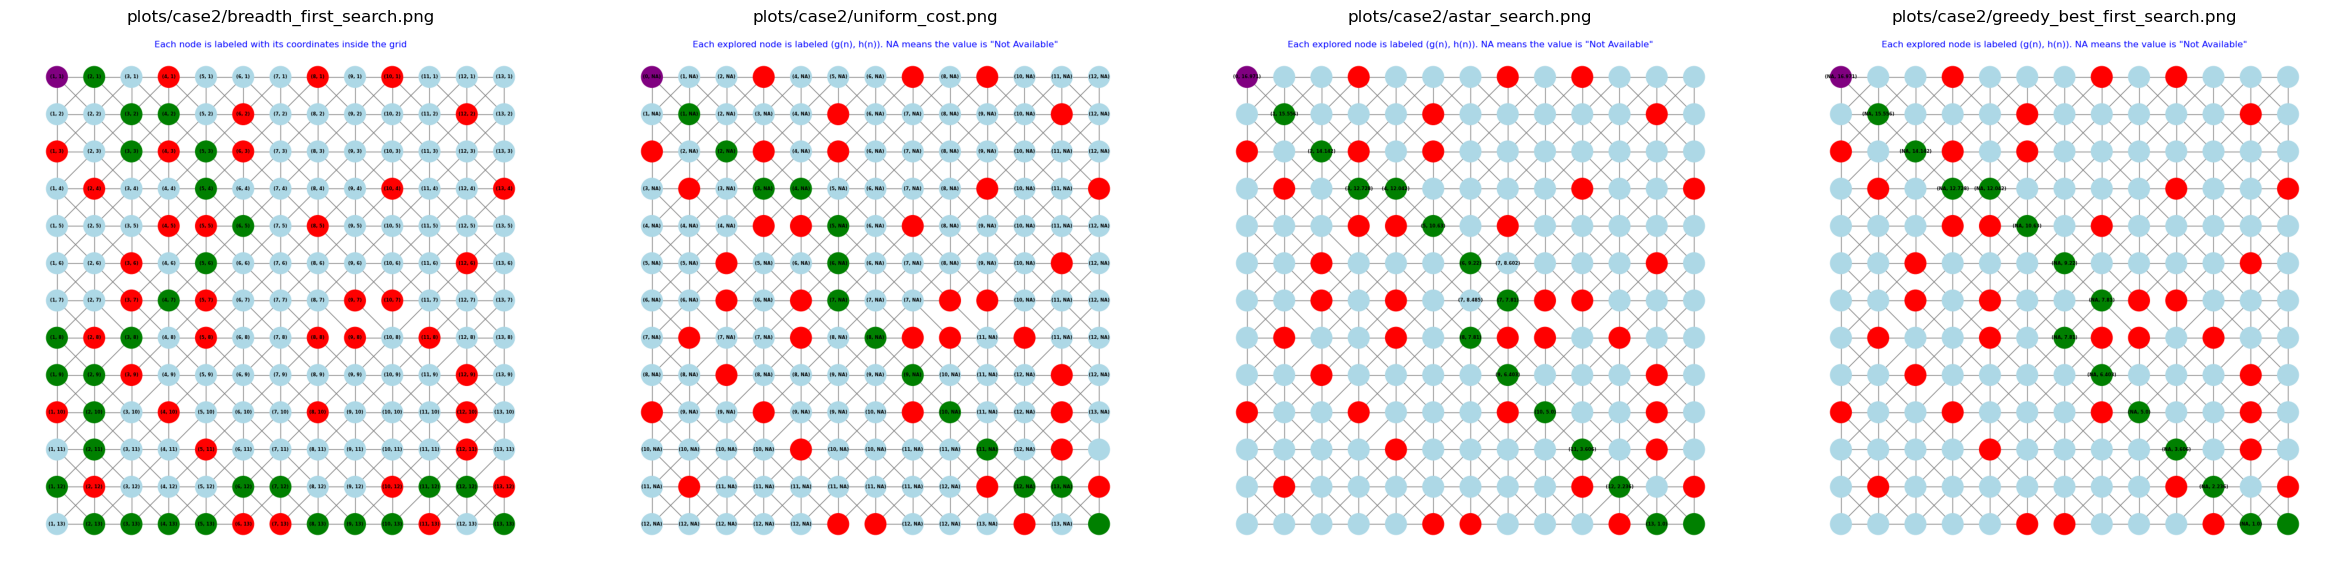

In [28]:
%matplotlib inline
plot_paths_case2 = ['plots/case2/breadth_first_search.png',
                    'plots/case2/uniform_cost.png',
                    'plots/case2/astar_search.png',
                    'plots/case2/greedy_best_first_search.png']

display_saved_plots(plot_paths_case2)

## <u> CASE 3 </u>
### Create the Environment

In [29]:
env_lv3 = gym.make(
    "MiniHack-Navigation-Custom-v0",
    des_file=des_file_static_lv3,
    #max_episode_steps=50,
    observation_keys =("chars", "colors", "specials", "pixel")
)

env_lv3.seed(42)
obs_lv3 = env_lv3.reset() #each reset generates a new environment instance
env_lv3.render()

plt.imshow(obs_lv3['pixel'][45:290, 0:250]) #Plots directly from minihack generator

game_map_lv3 = process_matrix(obs_lv3['chars'])
game_map_lv3_colors = process_matrix(obs_lv3['colors'])


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---------------                                                                 
|@..}...}.}...|                                                                 
|.....}.....}.|                                                                 
|}..}.}.......|                                                                 
|.}.......}..}|                                                                 
|...}}..}.....|                                                                 
|..}........}.|                                                                 
|..}.}...}}...|                                                                 
|.}..}..}}.}..|            

### General Problem

In [30]:
# Instantiate a problem from class GridWorldProblem
grid_problem3 = GridWorldProblem(game_map_lv3, find_state_coord(game_map_lv3, ord('@')), find_state_coord(game_map_lv3, ord('>')), game_map_lv3_colors)

print("Initial state:", grid_problem3.initial_state)
print("Goal state:", grid_problem3.goal_state)

# Create the basic graph
basic_graph = create_basic_graph(grid_problem3, grid_problem3.initial_state)

plot_graph(basic_graph, "plots/case3/case3.png")

Initial state: (1, 1)
Goal state: (13, 13)


### Uninformed Agent (Breadth-First Search)

In [31]:
uninformed_agent = UninformedSearchAgent(grid_problem3)
solution_path = uninformed_agent.search(breadth_first_search)

time_case3.append(uninformed_agent.execution_time())
path_case3.append(len(solution_path))

print(f'Time: {uninformed_agent.execution_time()} seconds')
print(f'The found path is long {len(solution_path)}.')

# Cost path computation
path_cost_case3.append(cost_computation(game_map_lv3, game_map_lv3_colors, solution_path))
print(f'The cost of the taken path is {cost_computation(game_map_lv3, game_map_lv3_colors, solution_path)}.')

# Highlight the explored nodes in green
basic_graph = create_basic_graph(grid_problem3, grid_problem3.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

# Plot the graph with both basic and explored nodes
plot_graph(explored_graph, "plots/case3/breadth_first_search.png")

Time: 0.002507 seconds
The found path is long 28.
The cost of the taken path is 36.


### Uninformed Agent (Dijkstra's Algorithm)

In [32]:
uninformed_agent = UninformedSearchAgent(grid_problem3)
solution_path, node_distances = uninformed_agent.search(uniform_cost_search)

time_case3.append(uninformed_agent.execution_time())
path_case3.append(len(solution_path))

print(f'Time: {uninformed_agent.execution_time()} seconds')
print(f'The taken path has the length {len(solution_path)} (steps).')

# Cost path computation
path_cost_case3.append(cost_computation(game_map_lv3, game_map_lv3_colors, solution_path))
print(f'The cost of the taken path is {cost_computation(game_map_lv3, game_map_lv3_colors, solution_path)}.')

# Highlight the explored nodes in green
basic_graph = create_basic_graph(grid_problem3, grid_problem3.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

# Plot the graph with both basic and explored nodes
plot_graph_distances(explored_graph, node_distances, "plots/case3/uniform_cost.png")

Time: 0.08001 seconds
The taken path has the length 14 (steps).
The cost of the taken path is 14.


### Informed Agent (A*)

In [33]:
informed_agent = InformedSearchAgent(grid_problem3)
solution_path, explored_nodes_paths, node_distances = informed_agent.search(astar_search, euclidean_distance)

time_case3.append(informed_agent.execution_time())
path_case3.append(len(solution_path))

print(f'Time: {informed_agent.execution_time()} seconds')
print(f"The found path is long {len(solution_path)}")

# Cost path computation
path_cost_case3.append(cost_computation(game_map_lv3, game_map_lv3_colors, solution_path))
print(f'The cost of the taken path is {cost_computation(game_map_lv3, game_map_lv3_colors, solution_path)}.')

# Highlight the explored nodes in green
basic_graph = create_basic_graph(grid_problem3, grid_problem3.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

# Plot the graph with both basic and explored nodes
plot_graph_distances(explored_graph, node_distances, "plots/case3/astar_search.png")

Time: 0.00075 seconds
The found path is long 14
The cost of the taken path is 14.


### Informed Agent (Greedy Best-First-Search)

In [34]:

informed_agent = InformedSearchAgent(grid_problem3)
solution_path, explored_nodes_paths, node_distances = informed_agent.search(greedy_best_first_search, euclidean_distance)

time_case3.append(informed_agent.execution_time())
path_case3.append(len(solution_path))

print(f'Time: {informed_agent.execution_time()} seconds')
print(f"The found path is long {len(solution_path)}")

# Cost path computation
path_cost_case3.append(cost_computation(game_map_lv3, game_map_lv3_colors, solution_path))
print(f'The cost of the taken path is {cost_computation(game_map_lv3, game_map_lv3_colors, solution_path)}.')

# Highlight the explored nodes in green
basic_graph = create_basic_graph(grid_problem3, grid_problem3.initial_state)
explored_graph = highlight_explored_nodes(basic_graph, solution_path)

# Plot the graph with both basic and explored nodes
plot_graph_distances(explored_graph, node_distances, "plots/case3/greedy_best_first_search.png")

Time: 0.000561 seconds
The found path is long 14
The cost of the taken path is 14.


In [35]:
comparison_case3.append(algorithms)
comparison_case3.append(time_case3)
comparison_case3.append(path_case3)
comparison_case3.append(path_cost_case3)
df_case3 = pd.DataFrame()
df_case3['Algorithm'] = algorithms
df_case3['Execution Time'] = time_case3
df_case3['Path Length'] = path_case3
df_case3['Path Cost'] = path_cost_case3
df_case3.set_index('Algorithm', inplace=True)
df_case3

Execution Time  Path Length  Path Cost
Algorithm                                                            
Breadth First Search (UA)            0.002507           28         36
Uniform Cost Search (UA)             0.080010           14         14
A* (IA)                              0.000750           14         14
Greedy Best First Search (IA)        0.000561           14         14

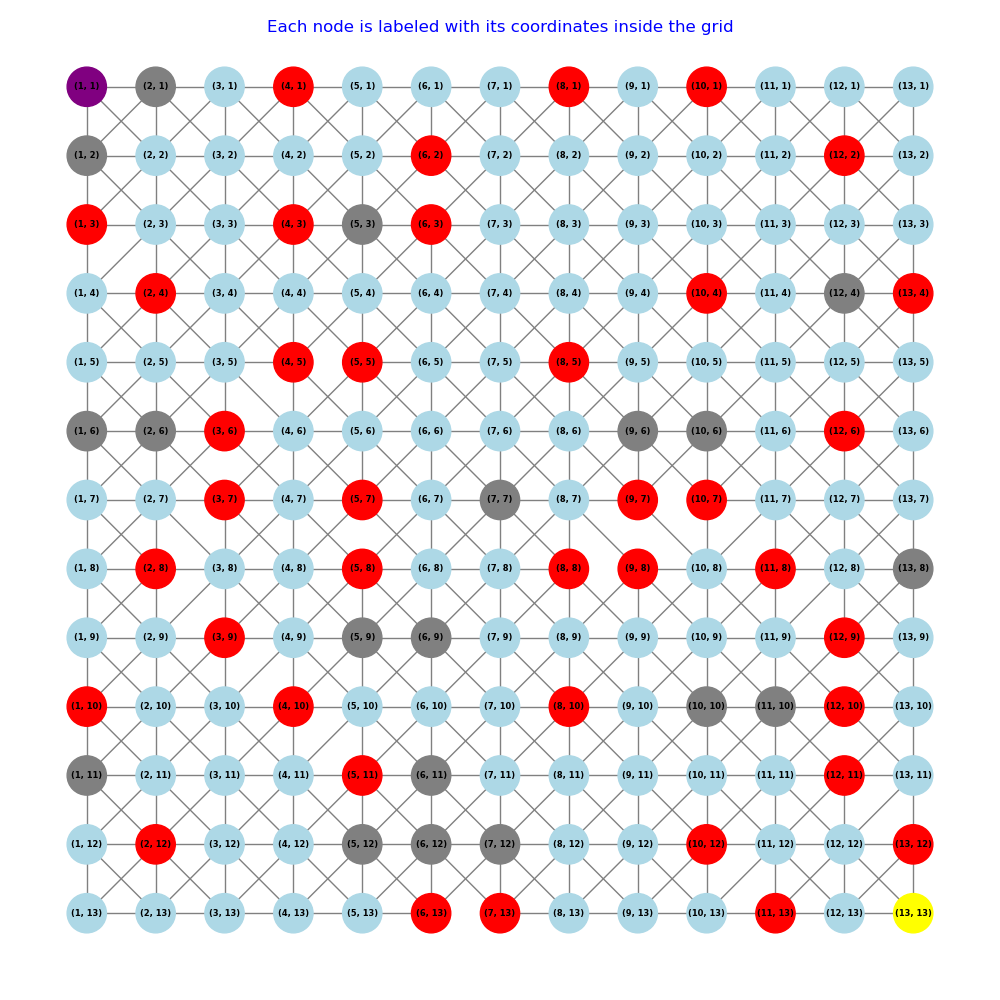

In [36]:
Image(filename='plots/case3/case3.png', width=500, height=500)

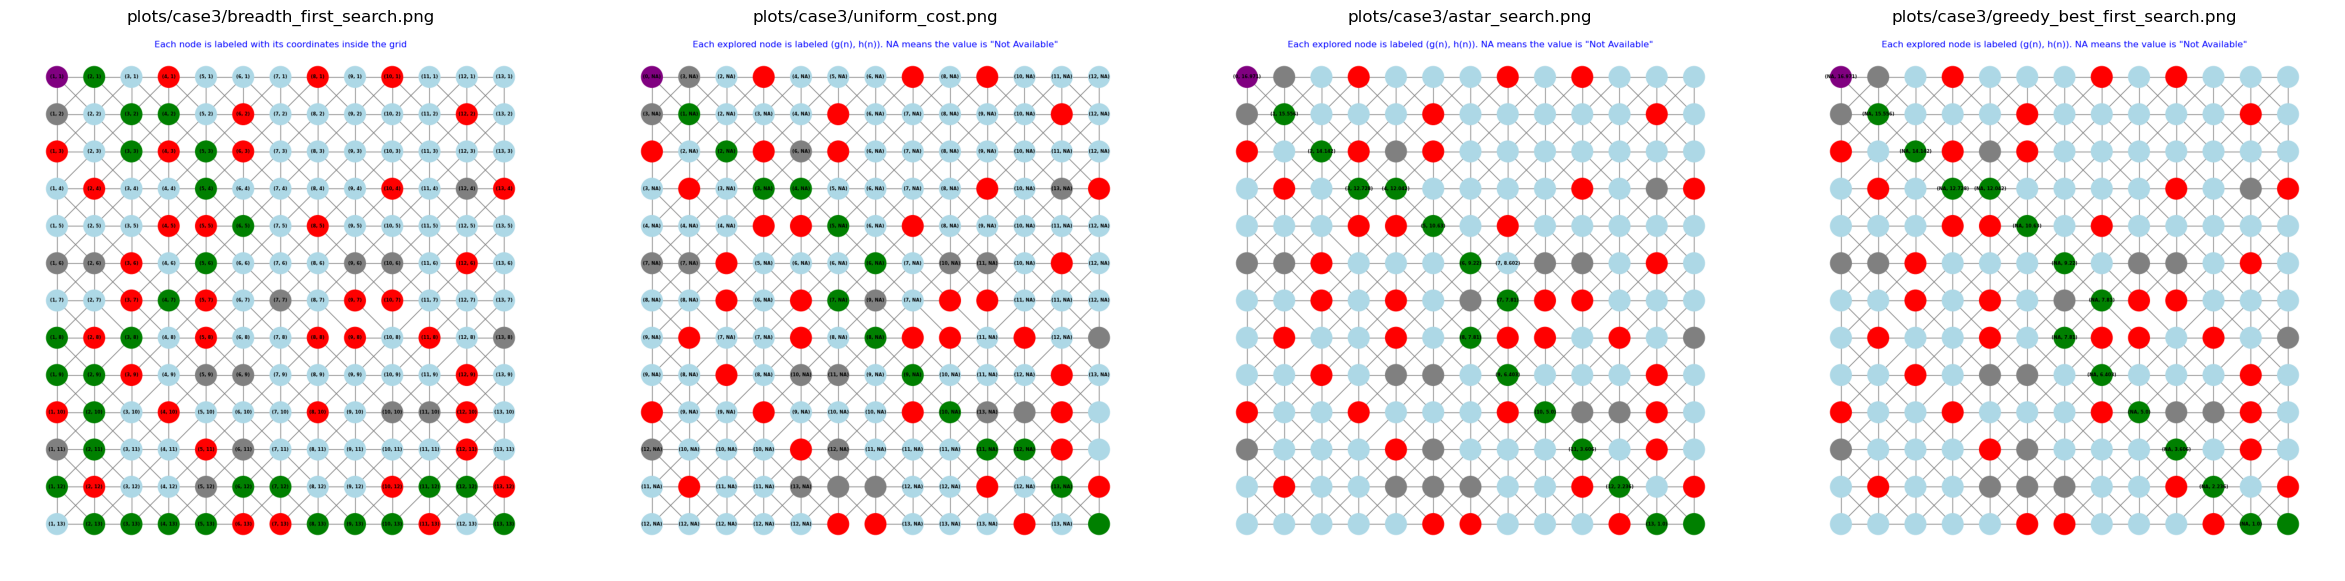

In [37]:
%matplotlib inline
plot_paths_case3 = ['plots/case3/breadth_first_search.png',
                    'plots/case3/uniform_cost.png',
                    'plots/case3/astar_search.png',
                    'plots/case3/greedy_best_first_search.png']

display_saved_plots(plot_paths_case3)

In [38]:
print("Case 1:")
print(df_case1)
print("\nCase 2:")
print(df_case2)
print("\nCase 3:")
print(df_case3)

Case 1:
                               Execution Time  Path Length  Path Cost
Algorithm                                                            
Breadth First Search (UA)            0.002803           29         29
Uniform Cost Search (UA)             0.008949           13         13
A* (IA)                              0.000733           13         13
Greedy Best First Search (IA)        0.000542           13         13

Case 2:
                               Execution Time  Path Length  Path Cost
Algorithm                                                            
Breadth First Search (UA)            0.002495           28         28
Uniform Cost Search (UA)             0.005856           14         14
A* (IA)                              0.000791           14         14
Greedy Best First Search (IA)        0.000589           14         14

Case 3:
                               Execution Time  Path Length  Path Cost
Algorithm                                                       

                               Execution Time  Path Length  Path Cost
Algorithm                                                            
Breadth First Search (UA)            0.002803           29         29
Uniform Cost Search (UA)             0.008949           13         13
A* (IA)                              0.000733           13         13
Greedy Best First Search (IA)        0.000542           13         13


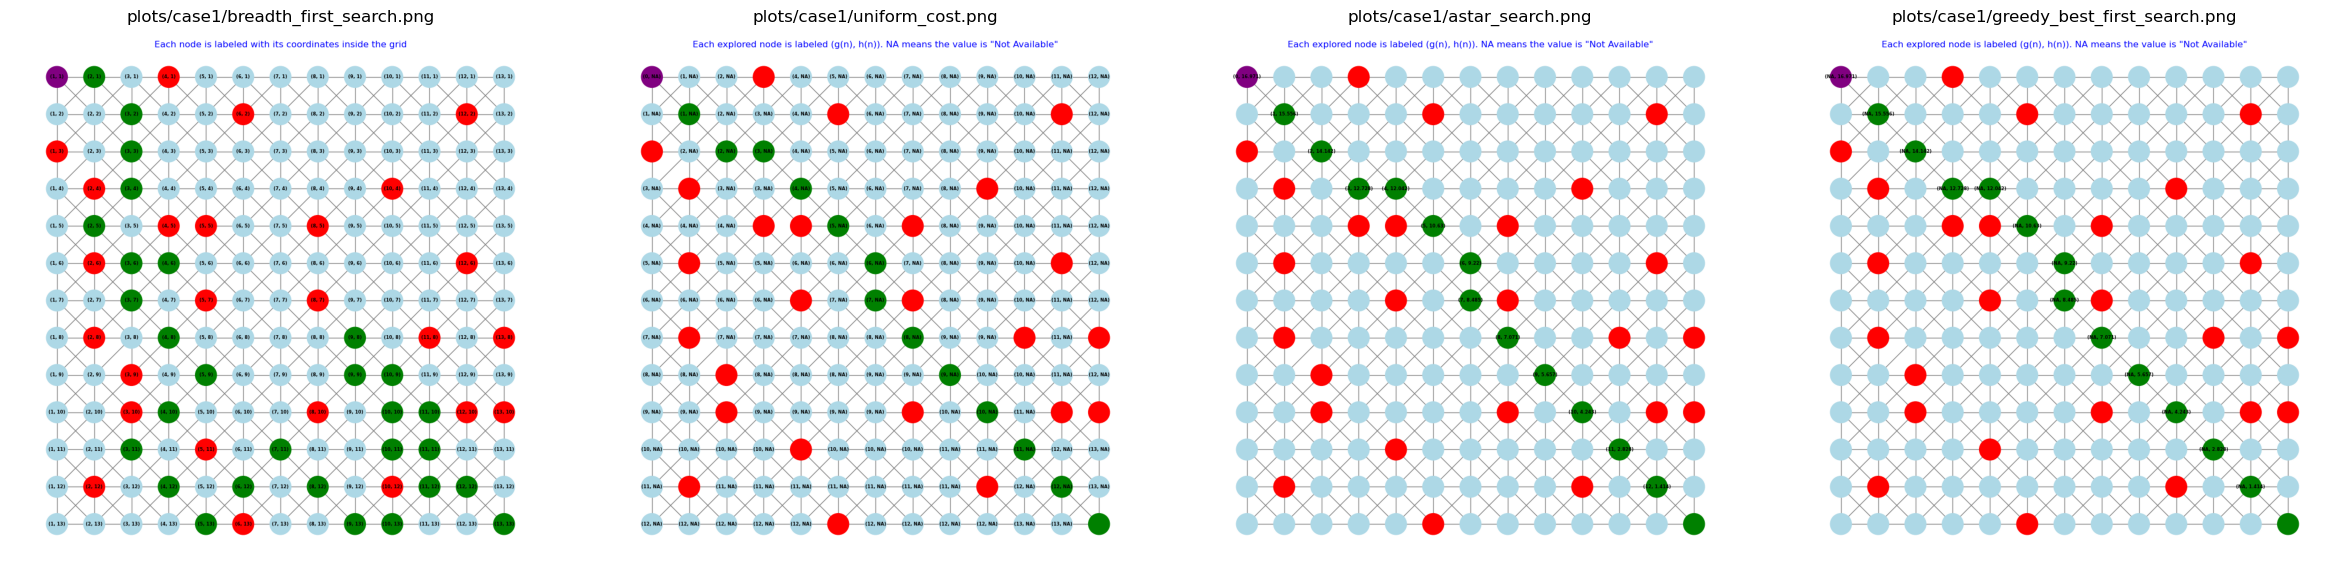

                               Execution Time  Path Length  Path Cost
Algorithm                                                            
Breadth First Search (UA)            0.002495           28         28
Uniform Cost Search (UA)             0.005856           14         14
A* (IA)                              0.000791           14         14
Greedy Best First Search (IA)        0.000589           14         14


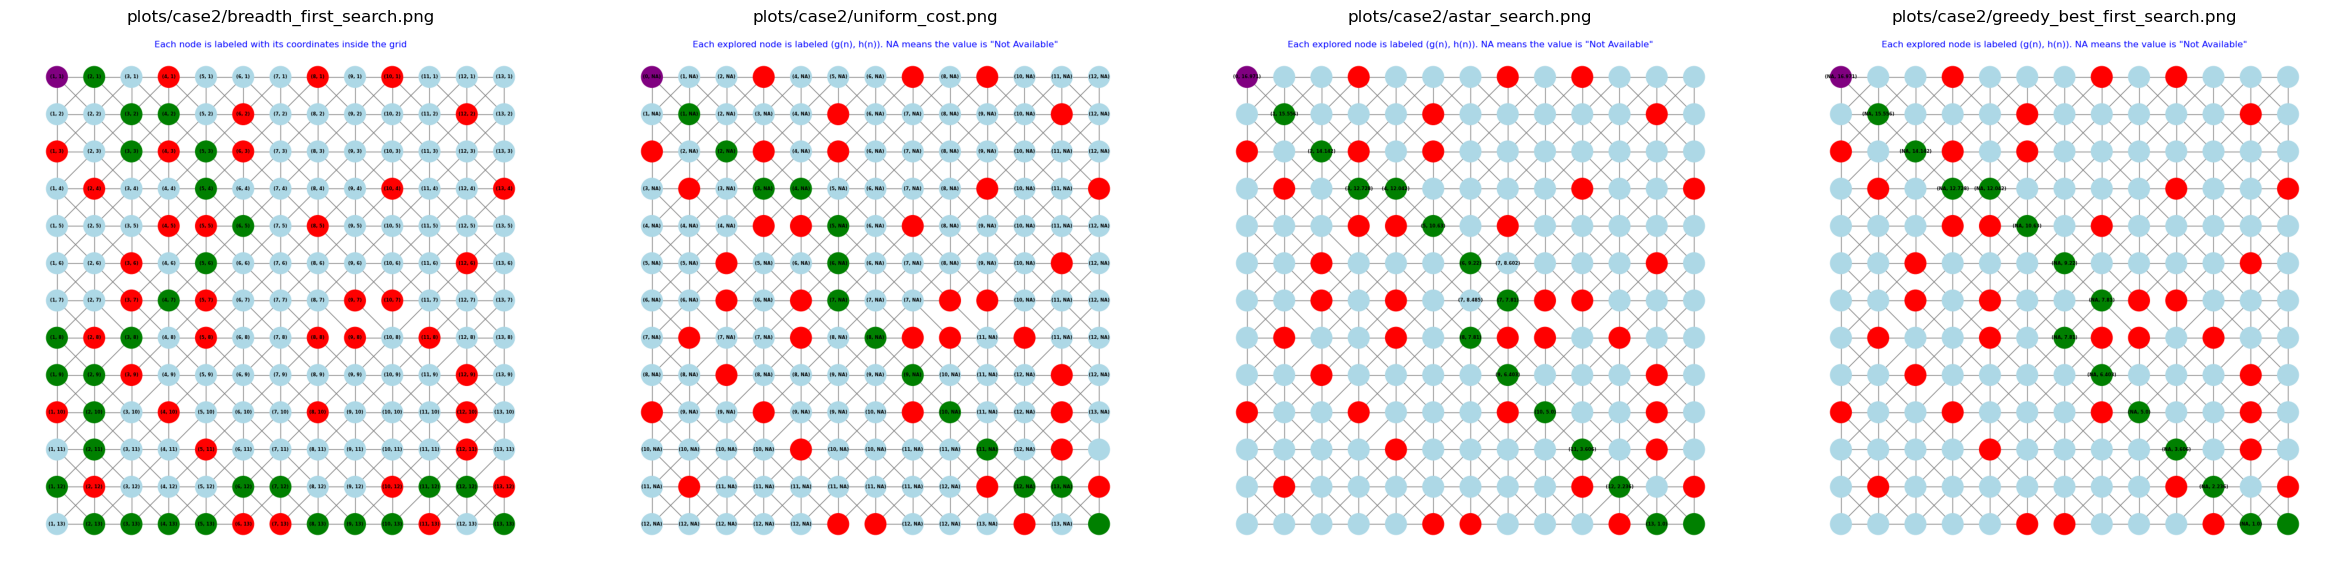

                               Execution Time  Path Length  Path Cost
Algorithm                                                            
Breadth First Search (UA)            0.002507           28         36
Uniform Cost Search (UA)             0.080010           14         14
A* (IA)                              0.000750           14         14
Greedy Best First Search (IA)        0.000561           14         14


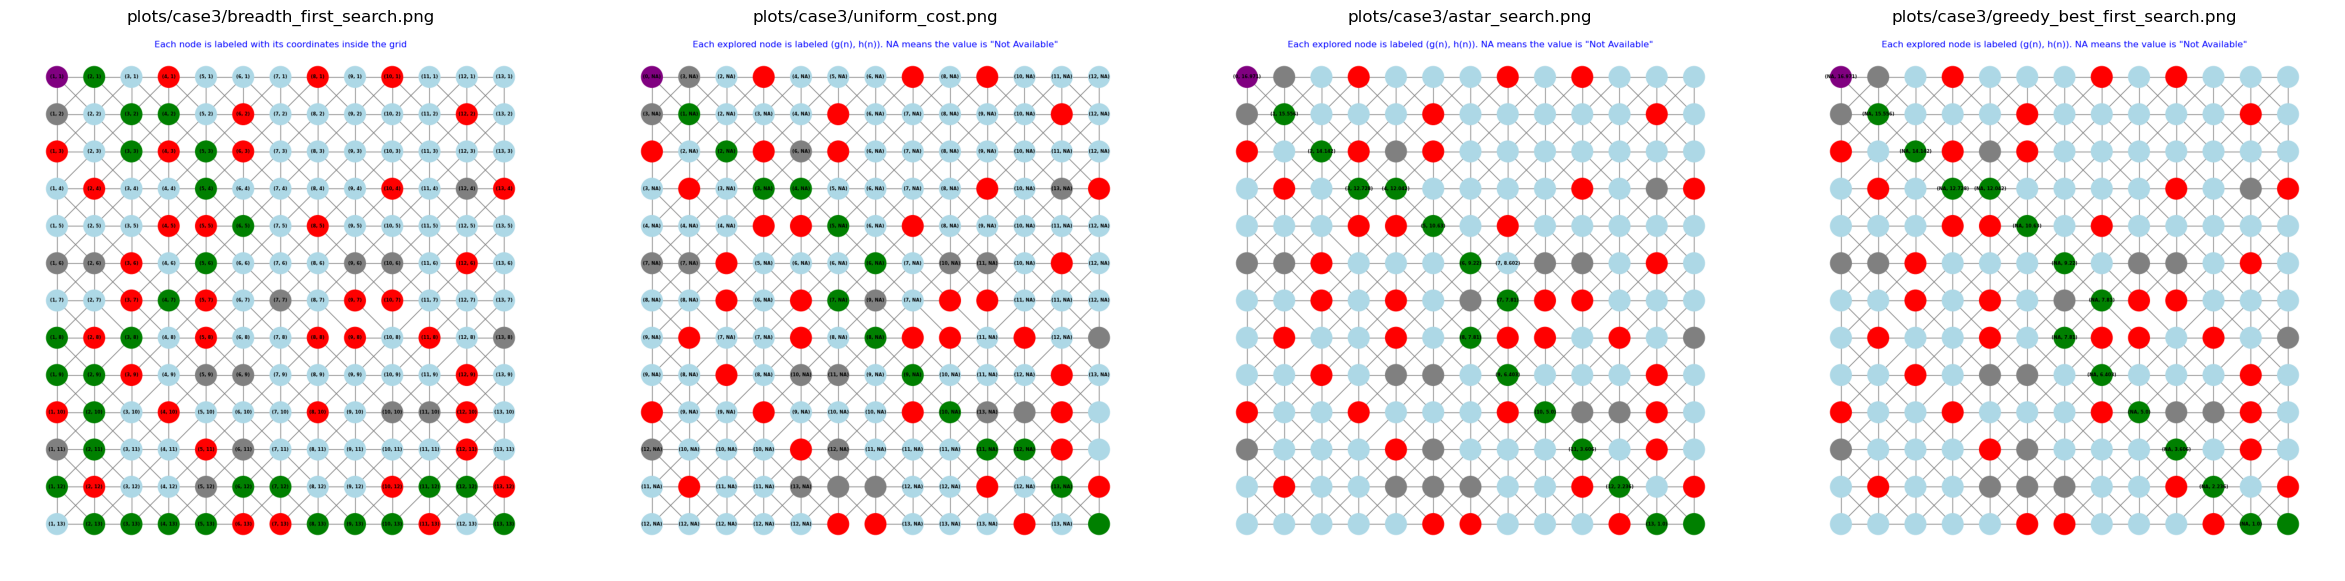

In [39]:
%matplotlib inline
print(df_case1)
display_saved_plots(plot_paths_case1)
print(df_case2)
display_saved_plots(plot_paths_case2)
print(df_case3)
display_saved_plots(plot_paths_case3)

In [40]:
plt.ion()

## <u> CASE 4 </u>
### Create the Environment: we added a hostile monster!

### <u> CASE 4.1 </u> 
#### The monster is a Rat!


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---------------                                                                 
|@..}...}.}...|                                                                 
|.....}.....}.|                                                                 
|}..}.}.......|                                                                 
|.}.......}..}|                                                                 
|...}}..}.....|                                                                 
|..}..r.....}.|                                                                 
|..}.}...}}...|                                                                 
|.}..}..}}.}..|            

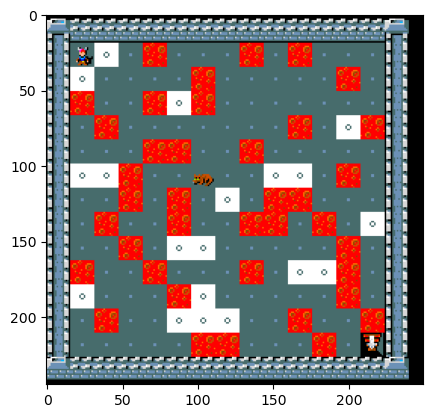

In [41]:
env_lv4_1 = gym.make(
    "MiniHack-Navigation-Custom-v0",
    des_file=des_file_static_lv4_1,
    #max_episode_steps=50,
    observation_keys =("chars", "colors", "specials", "pixel")
)

env_lv4_1.seed(42)
obs_lv4_1 = env_lv4_1.reset() #each reset generates a new environment instance
env_lv4_1.render()

plt.imshow(obs_lv4_1['pixel'][45:290, 0:250]) #Plots directly from minihack generator

game_map_lv4_1 = process_matrix(obs_lv4_1['chars'])
game_map_lv4_1_colors = process_matrix(obs_lv4_1['colors'])
game_lv4_1 = obs_lv4_1['pixel']

### General Problem

In [42]:
# Instantiate a problem from class GridWorldProblem
grid_problem4_1 = GridWorldProblem(game_map_lv4_1, find_state_coord(game_map_lv4_1, ord('@')), find_state_coord(game_map_lv4_1, ord('>')), game_map_lv4_1_colors)

print("Initial state:", grid_problem4_1.initial_state)
print("Goal state:", grid_problem4_1.goal_state)

# Create the basic graph
basic_graph = create_basic_graph(grid_problem4_1, grid_problem4_1.initial_state)

#plot_graph(basic_graph)

Initial state: (1, 1)
Goal state: (13, 13)


### Informed Agent for Online Search (online A*)

In [43]:
import IPython.display as display

onlineSearchAgent = OnlineSearchAgent(grid_problem4_1)

image = plt.imshow(game_lv4_1[25:300, :250])
agent = find_state_coord(grid_problem4_1.grid, ord('@'))

cost = 0

while agent!=None:
    
    print("Agent:", agent)

    valid_actions = grid_problem4_1.actions(agent)
    print("Valid directions:", valid_actions)

    action, next_state = onlineSearchAgent.online_search(onlineMode, agent, 'r', 'astar', 'euclidean')

    grid, _, _, _ = env_lv4_1.step(action) # Agent takes next step
    new_game_map_lv4_1 = process_matrix(grid['chars']) # Memorize and cuts out the new map
    grid_problem4_1.update_grid(new_game_map_lv4_1) # Update grid
    agent = find_state_coord(grid_problem4_1.grid, ord('@'))

    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(grid['pixel'][25:300, :250])
    time.sleep(1.5)

if agent==None:
    path = onlineSearchAgent.seq
    if grid_problem4_1.goal_test(next_state):
        plt.close()
        print('Goal reached!')
        path = onlineSearchAgent.seq
        path_cost = cost_computation(game_map_lv4_1, game_map_lv4_1_colors, path)
        print(f"Online A star - Path length: {len(path)}, Path cost: {path_cost}")
    
    else:
        print("You loose")

Goal reached!
Online A star - Path length: 17, Path cost: 17


In [44]:
env_lv4_1.seed(42)
obs_lv4_1 = env_lv4_1.reset() #each reset generates a new environment instance

game_map_lv4_1 = process_matrix(obs_lv4_1['chars'])
game_map_lv4_1_colors = process_matrix(obs_lv4_1['colors'])
game_lv4_1 = obs_lv4_1['pixel']

# Instantiate a problem from class GridWorldProblem
grid_problem4_1 = GridWorldProblem(game_map_lv4_1, find_state_coord(game_map_lv4_1, ord('@')), find_state_coord(game_map_lv4_1, ord('>')), game_map_lv4_1_colors)

In [45]:
import IPython.display as display

onlineSearchAgent = OnlineSearchAgent(grid_problem4_1)

image = plt.imshow(game_lv4_1[25:300, :250])
agent = find_state_coord(grid_problem4_1.grid, ord('@'))

cost = 0

while agent!=None:
    
    print("Agent:", agent)

    valid_actions = grid_problem4_1.actions(agent)
    print("Valid directions:", valid_actions)

    action, next_state = onlineSearchAgent.online_search(onlineMode, agent, 'r', 'astar', 'diagonal')

    grid, _, _, _ = env_lv4_1.step(action) # Agent takes next step
    new_game_map_lv4_1 = process_matrix(grid['chars']) # Memorize and cuts out the new map
    grid_problem4_1.update_grid(new_game_map_lv4_1) # Update grid
    agent = find_state_coord(grid_problem4_1.grid, ord('@'))

    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(grid['pixel'][25:300, :250])
    time.sleep(1.5)

if agent==None:
    path = onlineSearchAgent.seq
    if grid_problem4_1.goal_test(next_state):
        plt.close()
        print('Goal reached!')
        path = onlineSearchAgent.seq
        path_cost = cost_computation(game_map_lv4_1, game_map_lv4_1_colors, path)
        print(f"Online A star - Path length: {len(path)}, Path cost: {path_cost}")
    
    else:
        print("You loose")

Goal reached!
Online A star - Path length: 25, Path cost: 25


## Online Search with Greedy Algorithm

In [46]:
env_lv4_1.seed(42)
obs_lv4_1 = env_lv4_1.reset() #each reset generates a new environment instance

game_map_lv4_1 = process_matrix(obs_lv4_1['chars'])
game_map_lv4_1_colors = process_matrix(obs_lv4_1['colors'])
game_lv4_1 = obs_lv4_1['pixel']

# Instantiate a problem from class GridWorldProblem
grid_problem4_1 = GridWorldProblem(game_map_lv4_1, find_state_coord(game_map_lv4_1, ord('@')), find_state_coord(game_map_lv4_1, ord('>')), game_map_lv4_1_colors)

In [47]:
import IPython.display as display

onlineSearchAgent = OnlineSearchAgent(grid_problem4_1)

image = plt.imshow(game_lv4_1[25:300, :250])
agent = find_state_coord(grid_problem4_1.grid, ord('@'))

cost = 0

while agent!=None:
    
    print("Agent:", agent)

    valid_actions = grid_problem4_1.actions(agent)
    print("Valid directions:", valid_actions)

    action, next_state = onlineSearchAgent.online_search(onlineMode, agent, 'r', 'greedy', 'euclidean')

    grid, _, _, _ = env_lv4_1.step(action) # Agent takes next step
    new_game_map_lv4_1 = process_matrix(grid['chars']) # Memorize and cuts out the new map
    grid_problem4_1.update_grid(new_game_map_lv4_1) # Update grid
    agent = find_state_coord(grid_problem4_1.grid, ord('@'))

    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(grid['pixel'][25:300, :250])
    time.sleep(1.5)

if agent==None:
    path = onlineSearchAgent.seq
    if grid_problem4_1.goal_test(next_state):
        plt.close()
        print('Goal reached!')
        path = onlineSearchAgent.seq
        path_cost = cost_computation(game_map_lv4_1, game_map_lv4_1_colors, path)
        print(f"Online Greedy - Path length: {len(path)}, Path cost: {path_cost}")
    
    else:
        print("You loose")

Goal reached!
Online Greedy - Path length: 17, Path cost: 19


In [48]:
env_lv4_1.seed(42)
obs_lv4_1 = env_lv4_1.reset() #each reset generates a new environment instance

game_map_lv4_1 = process_matrix(obs_lv4_1['chars'])
game_map_lv4_1_colors = process_matrix(obs_lv4_1['colors'])
game_lv4_1 = obs_lv4_1['pixel']

# Instantiate a problem from class GridWorldProblem
grid_problem4_1 = GridWorldProblem(game_map_lv4_1, find_state_coord(game_map_lv4_1, ord('@')), find_state_coord(game_map_lv4_1, ord('>')), game_map_lv4_1_colors)

In [49]:
import IPython.display as display

onlineSearchAgent = OnlineSearchAgent(grid_problem4_1)

image = plt.imshow(game_lv4_1[25:300, :250])
agent = find_state_coord(grid_problem4_1.grid, ord('@'))

cost = 0

while agent!=None:
    
    print("Agent:", agent)

    valid_actions = grid_problem4_1.actions(agent)
    print("Valid directions:", valid_actions)

    action, next_state = onlineSearchAgent.online_search(onlineMode, agent, 'r', 'greedy', 'diagonal')

    grid, _, _, _ = env_lv4_1.step(action) # Agent takes next step
    new_game_map_lv4_1 = process_matrix(grid['chars']) # Memorize and cuts out the new map
    grid_problem4_1.update_grid(new_game_map_lv4_1) # Update grid
    agent = find_state_coord(grid_problem4_1.grid, ord('@'))

    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(grid['pixel'][25:300, :250])
    time.sleep(1.5)

if agent==None:
    path = onlineSearchAgent.seq
    if grid_problem4_1.goal_test(next_state):
        plt.close()
        print('Goal reached!')
        path = onlineSearchAgent.seq
        path_cost = cost_computation(game_map_lv4_1, game_map_lv4_1_colors, path)
        print(f"Online Greedy - Path length: {len(path)}, Path cost: {path_cost}")
    
    else:
        print("You loose")

Goal reached!
Online Greedy - Path length: 24, Path cost: 28


### <u> CASE 4.2 </u> 
#### The monster is a Giant Beetle!


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---------------                                                                 
|@..}...}.}...|                                                                 
|.....}.....}.|                                                                 
|}..}.}.......|                                                                 
|.}.......}..}|                                                                 
|...}}..}.....|                                                                 
|..}..a.....}.|                                                                 
|..}.}...}}...|                                                                 
|.}..}..}}.}..|            

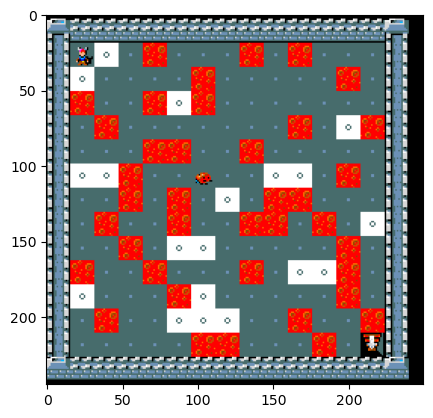

In [50]:
env_lv4_2 = gym.make(
    "MiniHack-Navigation-Custom-v0",
    des_file=des_file_static_lv4_2,
    #max_episode_steps=50,
    observation_keys =("chars", "colors", "specials", "pixel")
)

env_lv4_2.seed(42)
obs_lv4_2 = env_lv4_2.reset() #each reset generates a new environment instance
env_lv4_2.render()

plt.imshow(obs_lv4_2['pixel'][45:290, 0:250]) #Plots directly from minihack generator

game_map_lv4_2 = process_matrix(obs_lv4_2['chars'])
game_map_lv4_2_colors = process_matrix(obs_lv4_2['colors'])
game_lv4_2 = obs_lv4_2['pixel']

In [51]:
# Instantiate a problem from class GridWorldProblem
grid_problem4_2 = GridWorldProblem(game_map_lv4_2, find_state_coord(game_map_lv4_2, ord('@')), find_state_coord(game_map_lv4_2, ord('>')), game_map_lv4_2_colors)

print("Initial state:", grid_problem4_2.initial_state)
print("Goal state:", grid_problem4_2.goal_state)

# Create the basic graph
basic_graph = create_basic_graph(grid_problem4_2, grid_problem4_2.initial_state)

#plot_graph(basic_graph)

Initial state: (1, 1)
Goal state: (13, 13)


In [52]:
### Informed Agent for Online Search (online A*)
import IPython.display as display

onlineSearchAgent = OnlineSearchAgent(grid_problem4_2)

image = plt.imshow(game_lv4_2[25:300, :250])
agent = find_state_coord(grid_problem4_2.grid, ord('@'))

cost = 0

while agent!=None:
    
    print("Agent:", agent)

    valid_actions = grid_problem4_2.actions(agent)
    print("Valid directions:", valid_actions)

    action, next_state = onlineSearchAgent.online_search(onlineMode, agent, 'a', 'astar', 'euclidean')

    grid, _, _, _ = env_lv4_2.step(action) # Agent takes next step
    new_game_map_lv4_2 = process_matrix(grid['chars']) # Memorize and cuts out the new map
    grid_problem4_2.update_grid(new_game_map_lv4_2) # Update grid
    agent = find_state_coord(grid_problem4_2.grid, ord('@'))

    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(grid['pixel'][25:300, :250])
    time.sleep(1.5)

if agent==None:
    path = onlineSearchAgent.seq
    if grid_problem4_2.goal_test(next_state):
        plt.close()
        print('Goal reached!')
        path = onlineSearchAgent.seq
        path_cost = cost_computation(game_map_lv4_2, game_map_lv4_2_colors, path)
        print(f"Online A star - Path length: {len(path)}, Path cost: {path_cost}")
    
    else:
        print("You loose")

Goal reached!
Online A star - Path length: 17, Path cost: 17


In [53]:
# Online Search with Greedy Algorithm
env_lv4_2.seed(42)
obs_lv4_2 = env_lv4_2.reset() #each reset generates a new environment instance

game_map_lv4_2 = process_matrix(obs_lv4_2['chars'])
game_map_lv4_2_colors = process_matrix(obs_lv4_2['colors'])
game_lv4_2 = obs_lv4_2['pixel']

# Instantiate a problem from class GridWorldProblem
grid_problem4_2 = GridWorldProblem(game_map_lv4_2, find_state_coord(game_map_lv4_2, ord('@')), find_state_coord(game_map_lv4_2, ord('>')), game_map_lv4_2_colors)

In [54]:
### Informed Agent for Online Search (online A*)
import IPython.display as display

onlineSearchAgent = OnlineSearchAgent(grid_problem4_2)

image = plt.imshow(game_lv4_2[25:300, :250])
agent = find_state_coord(grid_problem4_2.grid, ord('@'))

cost = 0

while agent!=None:
    
    print("Agent:", agent)

    valid_actions = grid_problem4_2.actions(agent)
    print("Valid directions:", valid_actions)

    action, next_state = onlineSearchAgent.online_search(onlineMode, agent, 'a', 'astar', 'diagonal')

    grid, _, _, _ = env_lv4_2.step(action) # Agent takes next step
    new_game_map_lv4_2 = process_matrix(grid['chars']) # Memorize and cuts out the new map
    grid_problem4_2.update_grid(new_game_map_lv4_2) # Update grid
    agent = find_state_coord(grid_problem4_2.grid, ord('@'))

    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(grid['pixel'][25:300, :250])
    time.sleep(1.5)

if agent==None:
    path = onlineSearchAgent.seq
    if grid_problem4_2.goal_test(next_state):
        plt.close()
        print('Goal reached!')
        path = onlineSearchAgent.seq
        path_cost = cost_computation(game_map_lv4_2, game_map_lv4_2_colors, path)
        print(f"Online A star - Path length: {len(path)}, Path cost: {path_cost}")
    
    else:
        print("You loose")

Goal reached!
Online A star - Path length: 20, Path cost: 22


In [55]:
# Online Search with Greedy Algorithm
env_lv4_2.seed(42)
obs_lv4_2 = env_lv4_2.reset() #each reset generates a new environment instance

game_map_lv4_2 = process_matrix(obs_lv4_2['chars'])
game_map_lv4_2_colors = process_matrix(obs_lv4_2['colors'])
game_lv4_2 = obs_lv4_2['pixel']

# Instantiate a problem from class GridWorldProblem
grid_problem4_2 = GridWorldProblem(game_map_lv4_2, find_state_coord(game_map_lv4_2, ord('@')), find_state_coord(game_map_lv4_2, ord('>')), game_map_lv4_2_colors)

In [56]:
import IPython.display as display

onlineSearchAgent = OnlineSearchAgent(grid_problem4_2)

image = plt.imshow(game_lv4_2[25:300, :250])
agent = find_state_coord(grid_problem4_2.grid, ord('@'))

cost = 0

while agent!=None:
    
    print("Agent:", agent)

    valid_actions = grid_problem4_2.actions(agent)
    print("Valid directions:", valid_actions)

    action, next_state = onlineSearchAgent.online_search(onlineMode, agent, 'a', 'greedy', 'euclidean')

    grid, _, _, _ = env_lv4_2.step(action) # Agent takes next step
    new_game_map_lv4_2 = process_matrix(grid['chars']) # Memorize and cuts out the new map
    grid_problem4_2.update_grid(new_game_map_lv4_2) # Update grid
    agent = find_state_coord(grid_problem4_2.grid, ord('@'))

    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(grid['pixel'][25:300, :250])
    time.sleep(1.5)

if agent==None:
    path = onlineSearchAgent.seq
    if grid_problem4_2.goal_test(next_state):
        plt.close()
        print('Goal reached!')
        path = onlineSearchAgent.seq
        path_cost = cost_computation(game_map_lv4_2, game_map_lv4_2_colors, path)
        print(f"Online Greedy - Path length: {len(path)}, Path cost: {path_cost}")
    
    else:
        print("You loose")

Goal reached!
Online Greedy - Path length: 17, Path cost: 19


In [57]:
# Online Search with Greedy Algorithm
env_lv4_2.seed(42)
obs_lv4_2 = env_lv4_2.reset() #each reset generates a new environment instance

game_map_lv4_2 = process_matrix(obs_lv4_2['chars'])
game_map_lv4_2_colors = process_matrix(obs_lv4_2['colors'])
game_lv4_2 = obs_lv4_2['pixel']

# Instantiate a problem from class GridWorldProblem
grid_problem4_2 = GridWorldProblem(game_map_lv4_2, find_state_coord(game_map_lv4_2, ord('@')), find_state_coord(game_map_lv4_2, ord('>')), game_map_lv4_2_colors)

In [58]:
import IPython.display as display

onlineSearchAgent = OnlineSearchAgent(grid_problem4_2)

image = plt.imshow(game_lv4_2[25:300, :250])
agent = find_state_coord(grid_problem4_2.grid, ord('@'))

cost = 0

while agent!=None:
    
    print("Agent:", agent)

    valid_actions = grid_problem4_2.actions(agent)
    print("Valid directions:", valid_actions)

    action, next_state = onlineSearchAgent.online_search(onlineMode, agent, 'a', 'greedy', 'diagonal')

    grid, _, _, _ = env_lv4_2.step(action) # Agent takes next step
    new_game_map_lv4_2 = process_matrix(grid['chars']) # Memorize and cuts out the new map
    grid_problem4_2.update_grid(new_game_map_lv4_2) # Update grid
    agent = find_state_coord(grid_problem4_2.grid, ord('@'))

    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(grid['pixel'][25:300, :250])
    time.sleep(1.5)

if agent==None:
    path = onlineSearchAgent.seq
    if grid_problem4_2.goal_test(next_state):
        plt.close()
        print('Goal reached!')
        path = onlineSearchAgent.seq
        path_cost = cost_computation(game_map_lv4_2, game_map_lv4_2_colors, path)
        print(f"Online Greedy - Path length: {len(path)}, Path cost: {path_cost}")
    
    else:
        print("You loose")

Goal reached!
Online Greedy - Path length: 17, Path cost: 19


## <u> CASE 5 </u>
### Create the Environment: we added a dead end.

### <u> CASE 5.1 </u>
### The monster is a rat.


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---------------                                                                 
|@..}...}.}...|                                                                 
|.....}.....}.|                                                                 
|}..}.}.......|                                                                 
|.}.......}..}|                                                                 
|...}}..}..}..|                                                                 
|..}..r...}.}.|                                                                 
|..}.}...}}.}.|                                                                 
|.}..}..}}.}}.|            

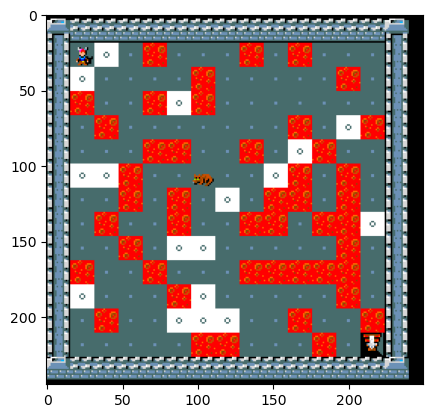

In [59]:
env_lv5_1 = gym.make(
    "MiniHack-Navigation-Custom-v0",
    des_file=des_file_static_lv5_1,
    #max_episode_steps=50,
    observation_keys =("chars", "colors", "specials", "pixel"),
)

env_lv5_1.seed(42)
obs_lv5_1 = env_lv5_1.reset() #each reset generates a new environment instance
env_lv5_1.render()

plt.imshow(obs_lv5_1['pixel'][45:290, 0:250]) #Plots directly from minihack generator

game_map_lv5_1 = process_matrix(obs_lv5_1['chars'])
game_map_lv5_1_colors = process_matrix(obs_lv5_1['colors'])
game_lv5_1 = obs_lv5_1['pixel']

In [60]:
# Instantiate a problem from class GridWorldProblem
grid_problem5_1 = GridWorldProblem(game_map_lv5_1, find_state_coord(game_map_lv5_1, ord('@')), find_state_coord(game_map_lv5_1, ord('>')), game_map_lv5_1_colors)

print("Initial state:", grid_problem5_1.initial_state)
print("Goal state:", grid_problem5_1.goal_state)

# Create the basic graph
basic_graph = create_basic_graph(grid_problem5_1, grid_problem5_1.initial_state)

#plot_graph(basic_graph)

Initial state: (1, 1)
Goal state: (13, 13)


In [61]:
import IPython.display as display

onlineSearchAgent = OnlineSearchAgent(grid_problem5_1)

image = plt.imshow(game_lv5_1[25:300, :250])
agent = find_state_coord(grid_problem5_1.grid, ord('@'))

cost = 0

while agent!=None:
    
    print("Agent:", agent)

    valid_actions = grid_problem5_1.actions(agent)
    print("Valid directions:", valid_actions)

    action, next_state = onlineSearchAgent.online_search(onlineMode, agent, 'r', 'astar', 'euclidean')

    grid, _, _, _ = env_lv5_1.step(action) # Agent takes next step
    new_game_map_lv5_1 = process_matrix(grid['chars']) # Memorize and cuts out the new map
    grid_problem5_1.update_grid(new_game_map_lv5_1) # Update grid
    agent = find_state_coord(grid_problem5_1.grid, ord('@'))

    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(grid['pixel'][25:300, :250])
    time.sleep(1.5)

if agent==None:
    path = onlineSearchAgent.seq
    if grid_problem5_1.goal_test(next_state):
        plt.close()
        print('Goal reached!')
        path = onlineSearchAgent.seq
        path_cost = cost_computation(game_map_lv5_1, game_map_lv5_1_colors, path)
        print(f"Online A star - Path length: {len(path)}, Path cost: {path_cost}")
    
    else:
        print("You loose")

Goal reached!
Online A star - Path length: 20, Path cost: 20


### <u> CASE 5.2 </u>
### The monster is a giant beetle.


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---------------                                                                 
|@..}...}.}...|                                                                 
|.....}.....}.|                                                                 
|}..}.}.......|                                                                 
|.}.......}..}|                                                                 
|...}}..}..}..|                                                                 
|..}..a...}.}.|                                                                 
|..}.}...}}.}.|                                                                 
|.}..}..}}.}}.|            

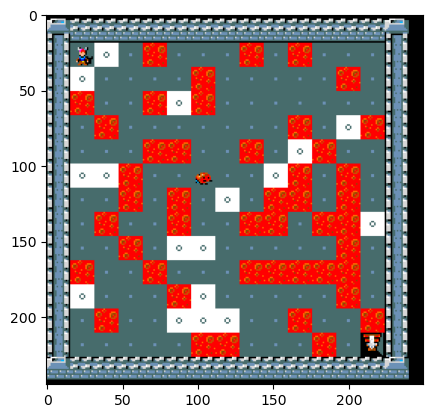

In [62]:
env_lv5_2 = gym.make(
    "MiniHack-Navigation-Custom-v0",
    des_file=des_file_static_lv5_2,
    #max_episode_steps=50,
    observation_keys =("chars", "colors", "specials", "pixel"),
)

env_lv5_2.seed(42)
obs_lv5_2 = env_lv5_2.reset() #each reset generates a new environment instance
env_lv5_2.render()

plt.imshow(obs_lv5_2['pixel'][45:290, 0:250]) #Plots directly from minihack generator

game_map_lv5_2 = process_matrix(obs_lv5_2['chars'])
game_map_lv5_2_colors = process_matrix(obs_lv5_2['colors'])
game_lv5_2 = obs_lv5_2['pixel']

In [63]:
# Instantiate a problem from class GridWorldProblem
grid_problem5_2 = GridWorldProblem(game_map_lv5_2, find_state_coord(game_map_lv5_2, ord('@')), find_state_coord(game_map_lv5_2, ord('>')), game_map_lv5_2_colors)

print("Initial state:", grid_problem5_2.initial_state)
print("Goal state:", grid_problem5_2.goal_state)

# Create the basic graph
basic_graph = create_basic_graph(grid_problem5_2, grid_problem5_2.initial_state)

#plot_graph(basic_graph)

Initial state: (1, 1)
Goal state: (13, 13)


In [64]:
### Informed Agent for Online Search (online A*)
import IPython.display as display

onlineSearchAgent = OnlineSearchAgent(grid_problem5_2)

image = plt.imshow(game_lv5_2[25:300, :250])
agent = find_state_coord(grid_problem5_2.grid, ord('@'))

cost = 0

while agent!=None:
    
    print("Agent:", agent)

    valid_actions = grid_problem5_2.actions(agent)
    print("Valid directions:", valid_actions)

    action, next_state = onlineSearchAgent.online_search(onlineMode, agent, 'a', 'astar', 'euclidean')

    grid, _, _, _ = env_lv5_2.step(action) # Agent takes next step
    new_game_map_lv5_2 = process_matrix(grid['chars']) # Memorize and cuts out the new map
    grid_problem5_2.update_grid(new_game_map_lv5_2) # Update grid
    agent = find_state_coord(grid_problem5_2.grid, ord('@'))

    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(grid['pixel'][25:300, :250])
    time.sleep(1.5)

if agent==None:
    path = onlineSearchAgent.seq
    if grid_problem5_2.goal_test(next_state):
        plt.close()
        print('Goal reached!')
        path = onlineSearchAgent.seq
        path_cost = cost_computation(game_map_lv5_2, game_map_lv5_2_colors, path)
        print(f"Online A star - Path length: {len(path)}, Path cost: {path_cost}")
    
    else:
        print("You loose")

Goal reached!
Online A star - Path length: 29, Path cost: 29
